## Задачи

1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную    статистику.


2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте            результат с помощью барплота. Подумайте, как можно улучшить график.


3. Сколько транзакций завершились ошибкой?


4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных              транзакций.


5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут            использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные          значения заполните нулями.


6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
   Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку              true_minute.

## Описание данных


Имеются следующие данные:

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – имя пользователя
- transaction – статус транзакции
- minute – сколько минут прошло с начала дня(доступны с 5 шага)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Задание 1
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [28]:
transaction_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv', parse_dates=['date'])
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [29]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


In [4]:
transaction_df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [30]:
transaction_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

## Задание 2

Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [7]:
transaction_df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [9]:
transaction_df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [10]:
trans_vc = transaction_df.transaction.value_counts()

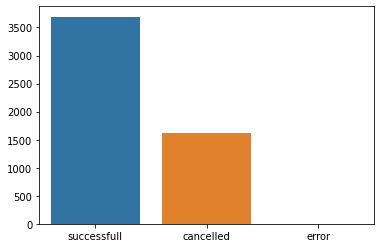

In [11]:
sns.barplot(x = trans_vc.index, y = trans_vc.values)

Text(0.5, 1.0, 'Распределение по типам транзакций')

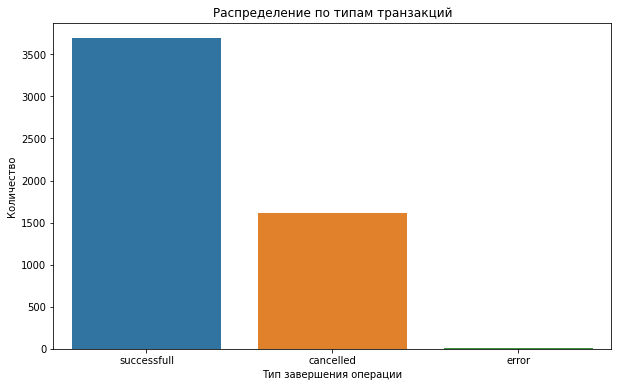

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = trans_vc.index, y = trans_vc.values, ax=ax)

ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения операции')
ax.set_title('Распределение по типам транзакций')


## Задание 3

Сколько транзакций завершились ошибкой?

In [19]:
trans_vc['error']

4

4 транзакции завершились ошибкой 

## Задание 4

Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [20]:
success_per_user = transaction_df.loc[transaction_df.transaction == 'successfull']\
                                 .groupby('name', as_index=False)\
                                 .size()

In [21]:
success_per_user.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [25]:
success_per_user.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


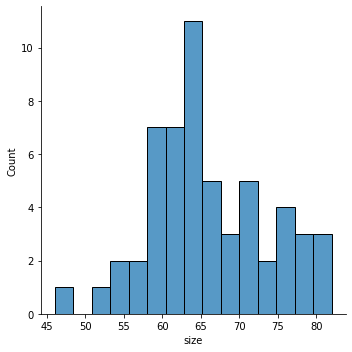

In [23]:
sns.displot(data=success_per_user, x='size', bins=15)

## Задание 5

Коллега прислал Вам обновленные данные. Постройте сводную таблицу, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [31]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-kuchiev/transaction_data_updated (1).csv',parse_dates=['date'])
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [32]:
trans_per_minute = df.groupby(['name','minute'], as_index=False).size()

In [33]:
trans_per_minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [34]:
pivot_trans_per_minute = trans_per_minute.pivot(index='minute', columns='name', values='size')
pivot_trans_per_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [35]:
pivot_trans_per_minute = pivot_trans_per_minute.fillna(0)

## Задание 6

Изучите представленный график. Помогите коллеге разобраться, есть ли в данных ошибка, или же всё хорошо. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [36]:
minute_trans = pivot_trans_per_minute.sum(axis=1)

In [37]:
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

График коллеги 

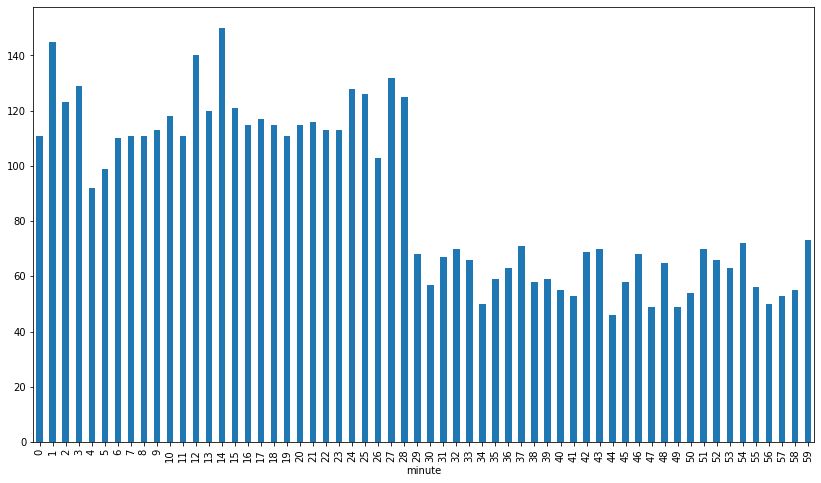

In [38]:
minute_trans.plot.bar(figsize=(14,8))

In [40]:
df.date.describe(datetime_is_numeric=True)

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

Для правильного графика нужно посчитать сколько прошло времени от начала дня до ее осуществеления 

In [41]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour * 60

In [42]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


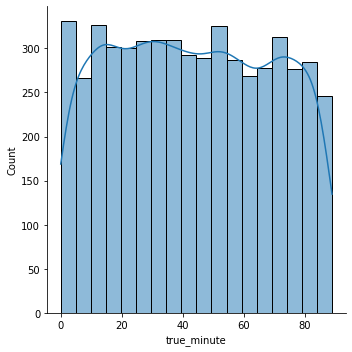

In [43]:
sns.displot(data=df, x='true_minute', kde=True)